<h1 style="background-color:DodgerBlue;"> Anamoly detection || Machine Learning:: •	KNN (K-Nearest Neighbors)</h1>



## 🧪 **Scenario: E-commerce User Behavior Anomaly Detection with KNN**

- **High-dimensional**: 3 features
- **Goal**: Detect unusual user behavior patterns, such as sudden spending surges, unusual purchasing frequencies, or abnormal spending habits.

### **E-commerce User Behavior Data** — It has multiple features like:
- **`purchase_frequency`** – The frequency of purchases made by the user per day.
- **`avg_purchase_amount`** – The average amount spent per purchase by the user.
- **`purchase_category_diversity`** – The diversity of product categories the user purchases from.

These features are great for detecting anomalies such as:
- Sudden **spending surges** in a short period of time.
- Unusual **purchasing frequency** compared to other users.
- Low or high **purchase category diversity**, indicating possible fraud or unrther adjustments! 😊

## 💡 **1. Generate Synthetic Data**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
np.random.seed(42)

# Simulate normal user behavior
n_normal = 300
page_views = np.random.normal(loc=5, scale=2, size=n_normal)
time_on_site = np.random.normal(loc=200, scale=50, size=n_normal)  # seconds
purchases = np.random.binomial(1, 0.3, size=n_normal)

# Simulate some anomalous users
n_anomalies = 5
anomalous_data = np.array([
    [20, 30, 0],   # high views, short visit, no purchase
    [1, 500, 0],   # low views, very long time, no purchase
    [10, 50, 5],   # high purchase, low visit
    [2, 100, 10],  # high purchase rate
    [0, 1000, 0]   # bot-like browsing
])

# Combine all data
X = np.vstack([
    np.column_stack((page_views, time_on_site, purchases)),
    anomalous_data
])

columns = ['page_views', 'time_on_site', 'purchases']
df = pd.DataFrame(X, columns=columns)
df['is_anomaly'] = 0
df.loc[df.index[-n_anomalies:], 'is_anomaly'] = 1

df.head()

,page_views,time_on_site,purchases,is_anomaly
0,5.993428,158.550249,0.0,0
1,4.723471,171.990948,1.0,0
2,6.295377,237.364680,1.0,0
3,8.046060,230.518513,0.0,0
4,4.531693,198.954920,0.0,0


## ⚙️ **2. Preprocess & Train the KNN Model**

In [2]:
from pyod.models.knn import KNN

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[columns])

# Train KNN anomaly detector
knn_model = KNN()
knn_model.fit(X_scaled)

# Predict anomalies
df['knn_anomaly'] = knn_model.predict(X_scaled)  # 1 = anomaly, 0 = normal

df.head()

,page_views,time_on_site,purchases,is_anomaly,knn_anomaly
0,5.993428,158.550249,0.0,0,0
1,4.723471,171.990948,1.0,0,0
2,6.295377,237.364680,1.0,0,0
3,8.046060,230.518513,0.0,0,0
4,4.531693,198.954920,0.0,0,0


## 📊 **3. Visualize Anomalies**

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


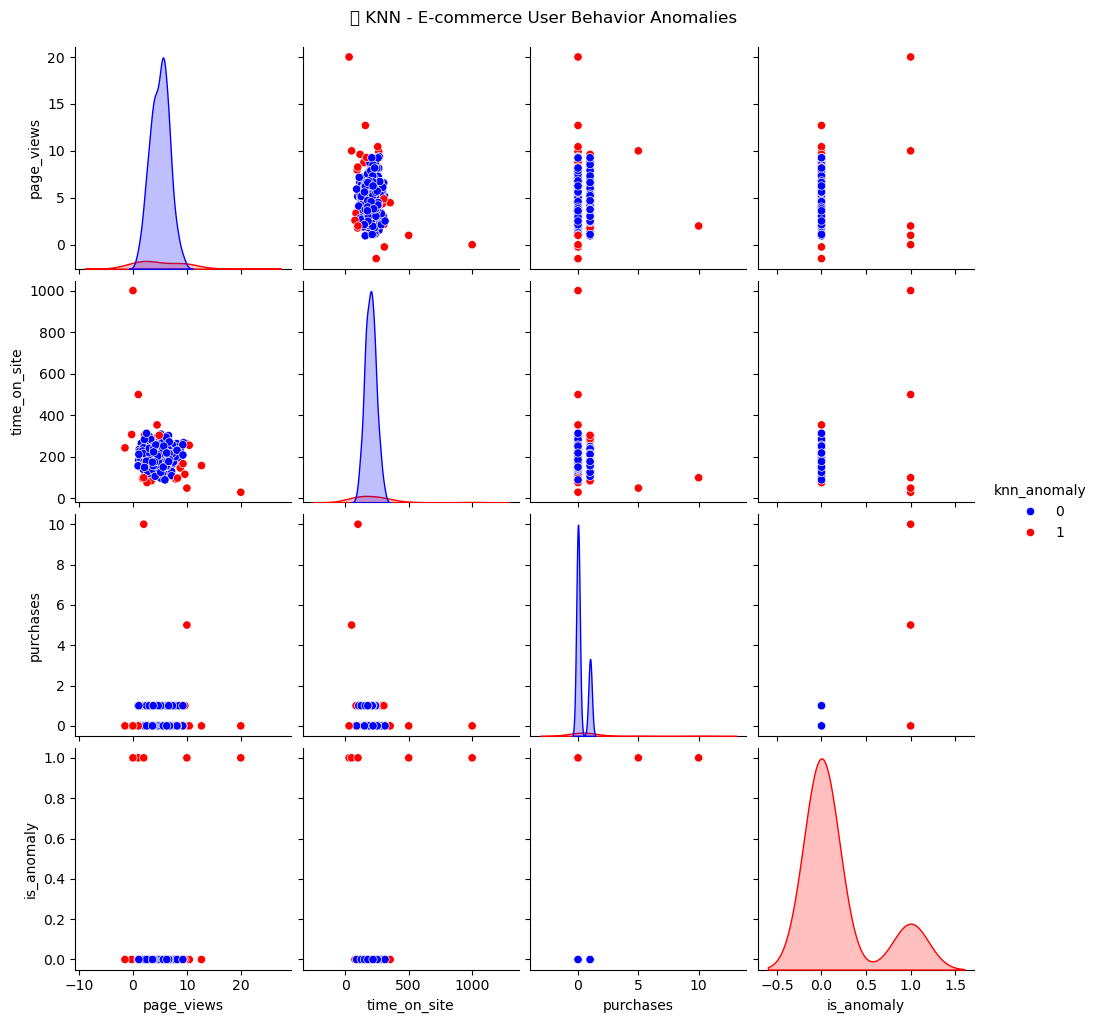

In [3]:
sns.pairplot(df, hue='knn_anomaly', diag_kind='kde', palette={0: 'blue', 1: 'red'})
plt.suptitle("🛍️ KNN - E-commerce User Behavior Anomalies", y=1.02)
plt.show()


## 💾 **4. Export Detected Anomalies**

In [4]:
detected_anomalies = df[df['knn_anomaly'] == 1]
detected_anomalies.to_csv("knn_user_behavior_anomalies.csv", index=False)
print(f"✅ Exported {len(detected_anomalies)} anomalies to CSV")


✅ Exported 28 anomalies to CSV


## 🧪 **5. Test on Unseen Suspicious User Data**

In [5]:
# New user behavior — likely suspicious
test_point = np.array([[25, 40, 0]])  # heavy browsing, short time, no purchase

# Create DataFrame to preserve feature names
test_df = pd.DataFrame(test_point, columns=columns)
test_scaled = scaler.transform(test_df)

# Predict
test_pred = knn_model.predict(test_scaled)
print("🚨 Test Point is Anomalous?" , bool(test_pred[0]))





🚨 Test Point is Anomalous? True
